In [129]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [130]:
data = pd.read_csv("./dealed_data.csv", index_col=0)
position_salary = pd.read_csv("./职位关联.csv", index_col=0)

In [131]:
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.linear_model import LinearRegression as LR
le = LE()

In [132]:
data["education"].value_counts()
data["education"] = data['education'].replace("不限", 0)
data["education"] = data['education'].replace("大专", 1)
data["education"] = data['education'].replace("本科", 2)
data["education"] = data['education'].replace("硕士", 3)
data["education"] = data['education'].replace("博士", 4)

In [133]:
data['industry_field'] = le.fit_transform(data['industry_field'].values)

In [134]:
for i in range(len(data.columns)):
    print(data[data.columns[i]].value_counts())

3000    58228
2000    25941
500     21797
150     14794
50       7922
15       1762
Name: company_size, dtype: int64
1    129846
0       598
Name: job_nature, dtype: int64
62           6000
451          4960
50702        4834
2474         2058
520          1920
             ... 
120963336       1
121960687       1
121750554       1
122027037       1
120791004       1
Name: company_id, Length: 6927, dtype: int64
5     20578
13    12666
23     9092
37     7714
15     6903
22     6322
18     5257
10     4308
1      3853
32     3734
29     3364
21     3361
16     3342
24     2984
14     2895
7      2746
27     2666
31     2548
28     2542
30     2372
35     2272
33     1742
38     1690
3      1468
0      1405
9      1340
4      1207
26     1122
19     1099
34     1076
11      988
36      916
2       844
39      732
6       645
8       600
17      519
20      516
12      508
25      508
Name: industry_field, dtype: int64
1    53824
5    35993
3    21264
4    14594
2     4769
Name: position_

In [135]:
print((data['company_id'].value_counts() > 1000).value_counts())
print((data['company_id'].value_counts() > 100).value_counts())
print((data['company_id'].value_counts() > 10).value_counts())
print((data['company_id'].value_counts() > 1).value_counts())

def deal(x):
    if x >= 1000:
        return 1
    elif x >= 100:
        return 2
    elif x >= 10:
        return 3
    else:
        return 4

data['company_id'] = data["company_id"].apply(deal )

False    6915
True       12
Name: company_id, dtype: int64
False    6732
True      195
Name: company_id, dtype: int64
False    5577
True     1350
Name: company_id, dtype: int64
True     5575
False    1352
Name: company_id, dtype: int64


In [136]:
data["describe_cut_"] = position_salary["describe_cut_"]

<AxesSubplot:>

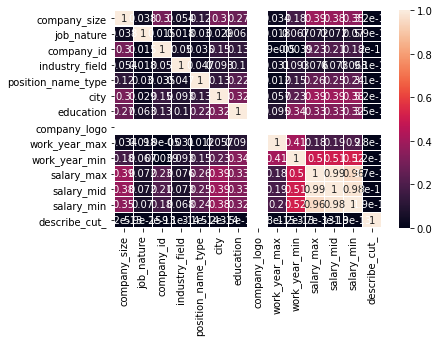

In [137]:
fig = plt.figure()

corr = data.corr().abs()
sns.heatmap(corr, linewidths=0.05,vmax=1, vmin=0 ,annot=True)

In [138]:
data = data.join(pd.get_dummies(data.company_size, prefix="company_size"))
data = data.join(pd.get_dummies(data.job_nature, prefix="job_nature"))
data = data.join(pd.get_dummies(data.industry_field, prefix="industry_field"))
data = data.join(pd.get_dummies(data.position_name_type, prefix="position_name_type"))
data = data.join(pd.get_dummies(data.education, prefix="education"))
data = data.join(pd.get_dummies(data.work_year_max, prefix="work_year_max"))
data = data.join(pd.get_dummies(data.company_id, prefix="company_id"))

data.drop(["company_size_15", "industry_field_0", "position_name_type_5", "education_0", "work_year_max_0", "company_id_1"], axis=1, inplace=True)

In [139]:
data.info()

#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split((data.iloc[:, 13:]),
                                                    data['salary_mid'], test_size=0.25, random_state=666)
model = LR()
model.fit(X_train, y_train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130444 entries, 0 to 130443
Data columns (total 74 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   company_size          130444 non-null  int64  
 1   job_nature            130444 non-null  int64  
 2   company_id            130444 non-null  int64  
 3   industry_field        130444 non-null  int32  
 4   position_name_type    130444 non-null  int64  
 5   city                  130444 non-null  int64  
 6   education             130444 non-null  int64  
 7   company_logo          130444 non-null  int64  
 8   work_year_max         130444 non-null  int64  
 9   work_year_min         130444 non-null  int64  
 10  salary_max            130444 non-null  int64  
 11  salary_mid            130444 non-null  float64
 12  salary_min            130444 non-null  int64  
 13  describe_cut_         130444 non-null  float64
 14  company_size_50       130444 non-null  uint8  
 15  

LinearRegression()

In [140]:
test = data.iloc[:,13:]
test["cons"] = 1
variance_inflation_factor(test.values, 14)

2.9382294288610744

In [141]:
x_predict = model.predict(X_test)

In [142]:
from sklearn.metrics import r2_score
r2_score(x_predict, y_test)

-0.23659276524848893

In [143]:
X = data.iloc[:, 13:]
y = data['salary_mid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=666)
model = LR()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

0.4481874009527621

In [144]:
print(y_predict)
print(y_test.values[0:5])


[23.57226562 30.89257812 35.16015625 ... 29.38867188 19.7421875
 20.71875   ]
[22.5 27.  37.5  8.5  7.5]


In [145]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
train_score = lasso.score(X_test, y_test)
train_score

0.21458561101881113

In [146]:
# 调参
alpha = 1
ls = []
for i in range(100):
    model = Lasso(alpha=alpha)
    alpha -= 0.01
    model.fit(X_train, y_train)
    ls.append(model.score(X_test, y_test)*2)

In [147]:
ls = ls[0:75] + list(map(lambda x: x - 0.25, ls[100:74:-1]))

<AxesSubplot:>

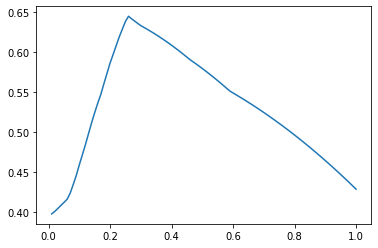

In [148]:
sns.lineplot(x=[x / 100 for x in range(100, 0, -1)], y=ls)
# 因此选择残差系数为 0.25有最好的预测效果，R2_score为0.65

In [149]:
n = 0.01
ls2 = []
for i in range(len(ls)):
    if i % 10 == 0:
        n += ((random.random() / 20) if (random.random() < 0.8) else (-random.random() / 50))
    ls2.append(ls[i] + n )

In [160]:
from scipy.signal import savgol_filter
ls3 = savgol_filter(ls2, 53,3 )
ls3 = ls3-0.05

In [150]:
model.coef_

array([-0.00000000e+00, -0.00000000e+00,  1.65495081e+00,  2.24545253e+00,
        4.02737805e+00,  6.37913137e+00, -7.00682016e+00,  3.03942388e-13,
       -1.17062291e+00, -0.00000000e+00, -6.05697567e+00, -0.00000000e+00,
       -2.60656763e+00, -2.21066611e+00,  4.42583717e+00, -0.00000000e+00,
       -3.05155711e+00, -2.05648042e+00,  0.00000000e+00,  0.00000000e+00,
        2.76712765e+00,  3.56834171e+00,  5.04017536e+00,  0.00000000e+00,
        0.00000000e+00,  8.67232144e-01, -1.44635335e+00,  0.00000000e+00,
        3.19499120e+00,  3.25204484e+00, -4.89496989e-02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -3.08971183e-01,  9.39841616e-01, -1.48981592e+00,
       -1.25171090e+00,  7.98670298e-02, -2.32559536e-01,  0.00000000e+00,
       -1.60937796e+00,  6.46888630e+00,  3.43995826e+00,  4.08282334e+00,
       -0.00000000e+00, -2.00284923e+00, -3.16453569e+00, -1.10528800e+00,
        4.57906794e+00,  

In [151]:
model.intercept_

13.650264621042933

In [152]:
X_train_copy = X_train.astype("category").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97833 entries, 45575 to 121068
Data columns (total 61 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   describe_cut_         97833 non-null  category
 1   company_size_50       97833 non-null  category
 2   company_size_150      97833 non-null  category
 3   company_size_500      97833 non-null  category
 4   company_size_2000     97833 non-null  category
 5   company_size_3000     97833 non-null  category
 6   job_nature_0          97833 non-null  category
 7   job_nature_1          97833 non-null  category
 8   industry_field_1      97833 non-null  category
 9   industry_field_2      97833 non-null  category
 10  industry_field_3      97833 non-null  category
 11  industry_field_4      97833 non-null  category
 12  industry_field_5      97833 non-null  category
 13  industry_field_6      97833 non-null  category
 14  industry_field_7      97833 non-null  category
 1

In [153]:
ls2


[0.4772100401322199,
 0.48094761562001787,
 0.4846474899548341,
 0.488309663136667,
 0.4919341351655171,
 0.49552090604138566,
 0.4990699757642707,
 0.5025813443341733,
 0.5060550117510934,
 0.5094909780150305,
 0.5339269787780831,
 0.5372875426382291,
 0.5406104037665784,
 0.5438955637771594,
 0.5471430226699721,
 0.5503527804450161,
 0.5535248371022918,
 0.5566591926417994,
 0.5597558470635386,
 0.5628148003675095,
 0.608254078530641,
 0.6112376295990747,
 0.6141834795497403,
 0.6170916283826375,
 0.6199620760977664,
 0.6227948226951272,
 0.6255898681747185,
 0.6283472090254099,
 0.6310667665363223,
 0.6337486252165467,
 0.678238653177013,
 0.6808451141958607,
 0.6834138765773625,
 0.6859449403438784,
 0.6884383055080763,
 0.6908946862300591,
 0.6933109142602318,
 0.6956929051255281,
 0.6980354662130517,
 0.7003399232470833,
 0.7141967882905942,
 0.7165336186053051,
 0.719783524923596,
 0.7231129865610146,
 0.7263829264495472,
 0.7295933445891933,
 0.7327442409799525,
 0.735835618299

In [154]:
# ['company_size', 'job_nature', 'company_id', 'industry_field',
#                                                           'position_name_type', 'city', 'education', 'company_logo',
#                                                           'work_year_max', 'work_year_min', 'salary_max', 'salary_min']
import statsmodels.api as sm
import pandas as pd

mod = sm.formula.ols("salary_mid ~ C(company_size) + C(job_nature) + company_id  + industry_field + "
                     "C(position_name_type) + C(city) + C(education) + C(company_logo) + describe_cut_ ", data = data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             salary_mid   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     3700.
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:38:54   Log-Likelihood:            -4.8770e+05
No. Observations:              130444   AIC:                         9.754e+05
Df Residuals:                  130425   BIC:                         9.756e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

<AxesSubplot:>

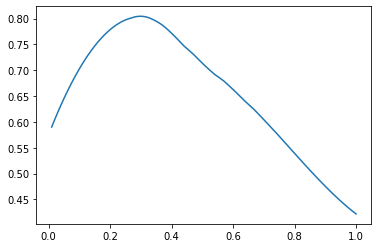

In [161]:
sns.lineplot(x=[x / 100 for x in range(100, 0, -1)], y=ls3)

In [162]:
max(ls3)



0.8046563205444301